In [14]:
import numpy as np, networkx as nx
from plotly import graph_objects as go

g = nx.empty_graph(100, )


def get_random_edge(g, u):
    if edges := list(g.edges(u)):
        v = np.random.randint(len(edges))
        return edges[v][1]
    
def strengthen(g, u, eta = 1):
    if v:= get_random_edge(g, u):
        weight = g[u][v].get('weight', 1)
        g[u][v]['weight'] = weight + 1
    return g

def change(g, u):
    if v := get_random_edge(g, u):
        weight = g[u][v].get('weight', 1) + np.random.randn()
        g[u][v]['weight'] = weight
def weaken(g, u, eta = 1):
    return strengthen(g, u, eta)
    

def randomize(g, u):
    if v := get_random_edge(g, u):
        weight = g[u][v].get('weight', 1)
        g.remove_edge(g, u)
    node = np.random.choice(list(g.nodes()))
    g.add_edge(u, node)
    return g

def delete(g, u):
    if v:= get_random_edge(g, u):
        g.remove_edge(u, v)
    return g

def update(g):
    """
    Update function
    Input:
    :g: networkx graph
    Returns:
    :g: update network graph """
    
    # possible action each agent can take 
    actions = {\
               0: change,\
#                0 : strengthen,\
#                1 : weaken,\
               1 : randomize,\
#                3 : delete,\
              }
    
    # simulate
    nodes = list(g.nodes())
    np.random.shuffle(nodes) 
    N = len(actions)
    for node in nodes:
        action = np.random.randint(0, N)
#         print(action, node)
        try:
            actions[action](g, node)
        except:
            continue
    return g
for t in range(10000):
    update(g)

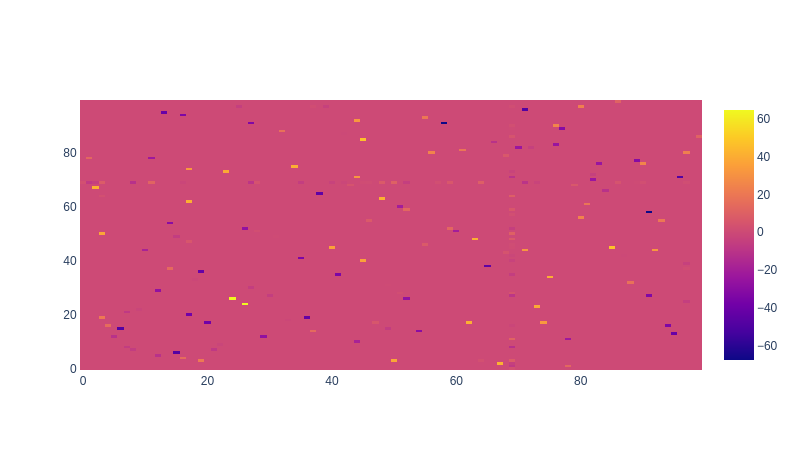

/home/casper/miniconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




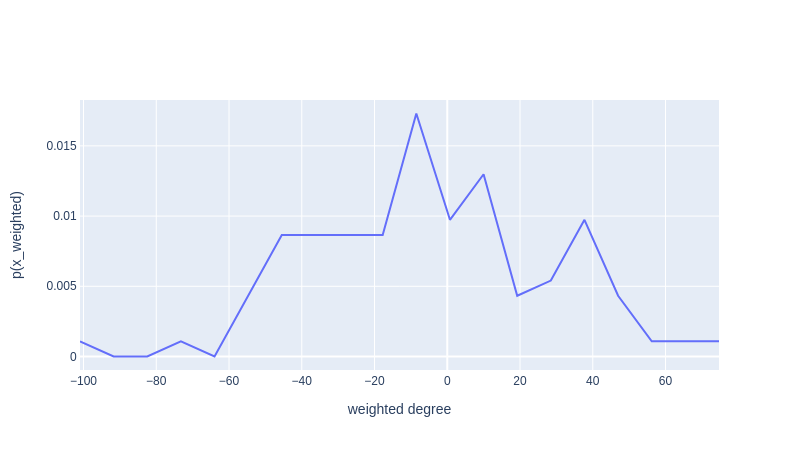

In [15]:
z = nx.adj_matrix(g).todense()
heatmap = go.Heatmap(z = z)
fig = go.Figure(data = heatmap)
fig.show()


line = sorted([i[1] for i in nx.degree(g, weight = 'weight')])[::-1]
bins, counts = np.histogram(line, bins = 20, density = 1)
line = go.Line(x = counts, y = bins)
fig = go.Figure(data = line)
fig.update_layout(xaxis_title = 'weighted degree',\
                 yaxis_title = 'p(x_weighted)')
fig.show()